In [1]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv("cleaned_data.csv")

In [8]:
print (df)

      humidity  windspeed  winddirection  tempC  tempminC  tempmaxC  \
0         79.5       12.2          343.1   18.6      15.2      24.2   
1         85.0       11.2          341.0   17.4      14.8      22.4   
2         83.2       11.5          340.9   17.9      14.0      24.2   
3         82.8       10.1          345.9   17.2      13.4      23.8   
4         83.0        9.7          341.3   17.2      13.6      23.8   
...        ...        ...            ...    ...       ...       ...   
5054      45.8       20.5          223.5   34.3      28.3      42.3   
5055      49.9       17.6          200.4   34.4      28.0      42.6   
5056      53.5       32.8          204.0   33.9      27.5      43.4   
5057      59.1       27.4          203.8   33.7      26.9      43.2   
5058      55.4       25.2          214.1   34.5      27.4      43.6   

      precipitation        date    month  year  
0               0.0  2022-01-01  January  2022  
1               0.0  2022-01-02  January  2022  


In [9]:
df.isnull().sum()

humidity         0
windspeed        0
winddirection    0
tempC            0
tempminC         0
tempmaxC         0
precipitation    0
date             0
month            0
year             0
dtype: int64

In [12]:
df['date']= pd.to_datetime(df['date'], errors='coerce')
df['month']=df['date'].dt.month_name()
month_order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"]
df["month"]=pd.Categorical(df["month"], categories=month_order, ordered=True)
monthly_avg_humidity=df.groupby("month")["humidity"].mean()
monthly_avg_humidity=df.groupby('month')['humidity'].mean()
print(monthly_avg_humidity)

month
January      68.904086
February     61.765330
March        61.683011
April        67.736830
May          75.364055
June         82.528095
July         85.834101
August       86.711751
September    86.528333
October      83.226738
November     77.218611
December     74.901837
Name: humidity, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_12732\4224794980.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_humidity=df.groupby("month")["humidity"].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_12732\4224794980.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_humidity=df.groupby('month')['humidity'].mean()


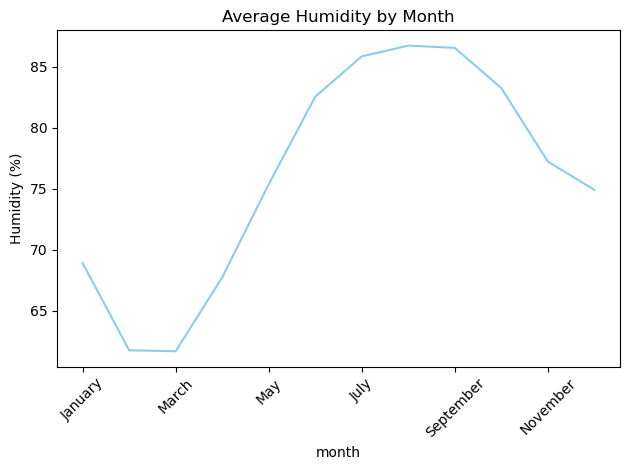

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
monthly_avg_humidity.plot(kind='line', color='skyblue')
plt.title('Average Humidity by Month')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
yearly_stats= df.groupby('year')['humidity'].agg(['max','min', 'mean'])
print(yearly_stats)

       max   min       mean
year                       
2010  96.2  32.5  73.991781
2011  95.7  22.9  73.548219
2012  95.7  30.8  72.801913
2013  96.3  31.1  74.642742
2014  94.9  37.5  72.696438
2015  96.2  56.0  80.879726
2016  96.4  64.4  81.303005
2017  97.0  62.1  81.312603
2018  94.0  60.9  79.684932
2019  95.6  59.9  79.940822
2020  95.9  59.9  80.741257
2021  94.0  59.4  80.284364
2022  95.6  22.9  66.028727
2023  94.5  30.3  68.158904
2024  76.8  32.0  55.735294


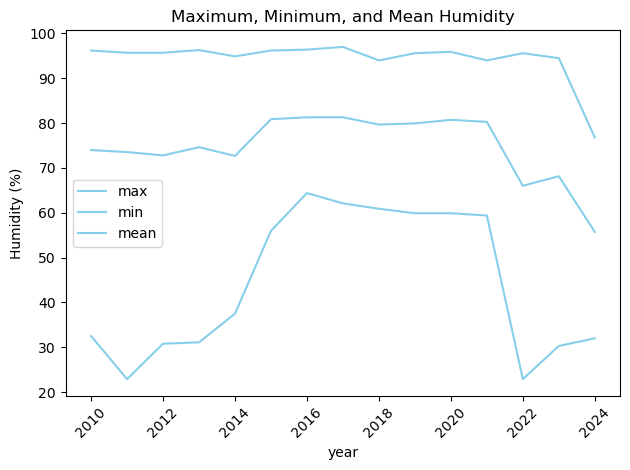

In [18]:
yearly_stats.plot(kind='line', color='skyblue')
plt.title('Maximum, Minimum, and Mean Humidity')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

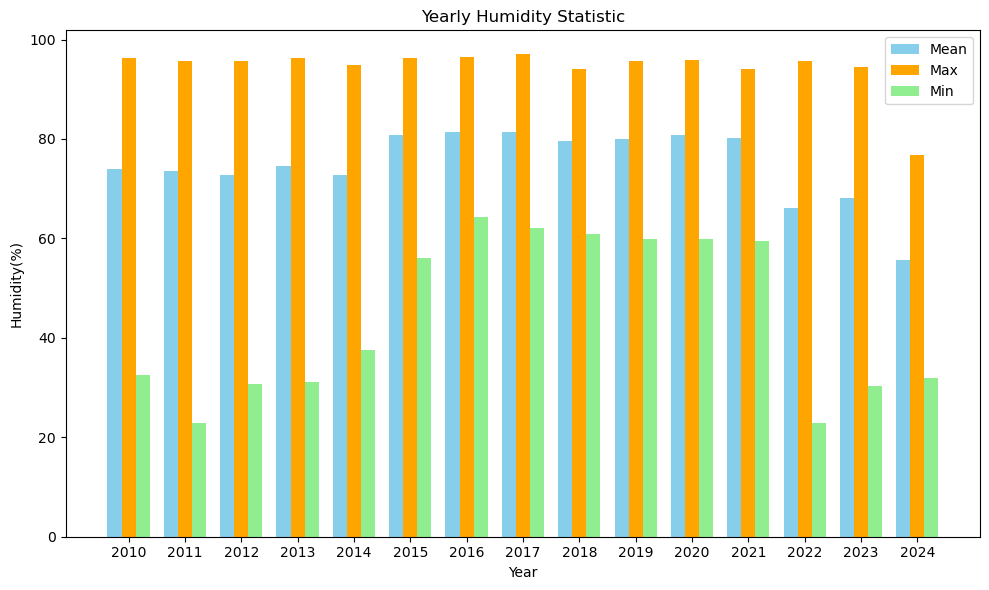

In [21]:
yearly_stats.index = yearly_stats.index.astype(str)
x=np.arange(len(yearly_stats))
width=0.25
fig, ax=plt.subplots(figsize=(10,6))
bar1=ax.bar(x-width, yearly_stats['mean'], width, label='Mean', color='skyblue')
bar2=ax.bar(x, yearly_stats['max'], width, label='Max', color='orange')
bar3=ax.bar(x+width, yearly_stats['min'], width, label='Min', color='lightgreen')
ax.set_xlabel('Year')
ax.set_ylabel('Humidity(%)')
ax.set_title('Yearly Humidity Statistic')
ax.set_xticks(x)
ax.set_xticklabels(yearly_stats.index)
ax.legend()
plt.tight_layout()
plt.show()

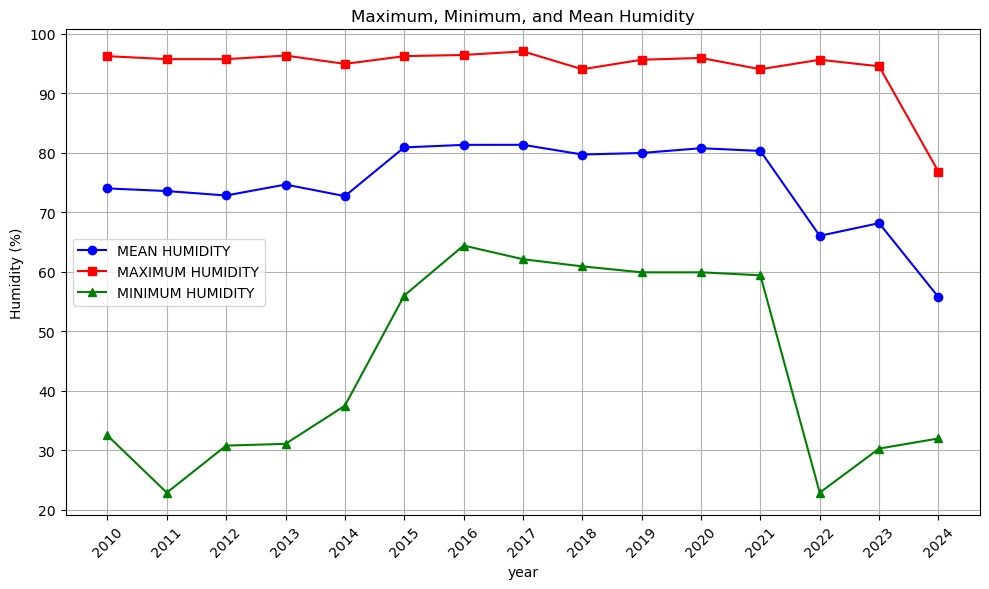

In [29]:
plt.figure(figsize=(10,6))
plt.plot(yearly_stats.index, yearly_stats['mean'], marker='o', label="MEAN HUMIDITY", color='blue')
plt.plot(yearly_stats.index, yearly_stats['max'], marker='s', label="MAXIMUM HUMIDITY", color='red')
plt.plot(yearly_stats.index, yearly_stats['min'], marker='^', label="MINIMUM HUMIDITY", color='green')
plt.title('Maximum, Minimum, and Mean Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel ('year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

In [31]:
df['date']=pd.to_datetime(df['date'], errors='coerce')
df.set_index('date', inplace=True)

In [32]:
monthly_humidity=df['humidity'].resample('M').mean()
print(monthly_humidity)

C:\Users\user\AppData\Local\Temp\ipykernel_12732\2954743865.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_humidity=df['humidity'].resample('M').mean()


date
2010-01-31    55.848387
2010-02-28    50.375000
2010-03-31    52.319355
2010-04-30    62.956667
2010-05-31    79.551613
                ...    
2023-12-31    65.554839
2024-01-31    59.161290
2024-02-29    56.758621
2024-03-31    55.235484
2024-04-30    51.435714
Freq: ME, Name: humidity, Length: 172, dtype: float64


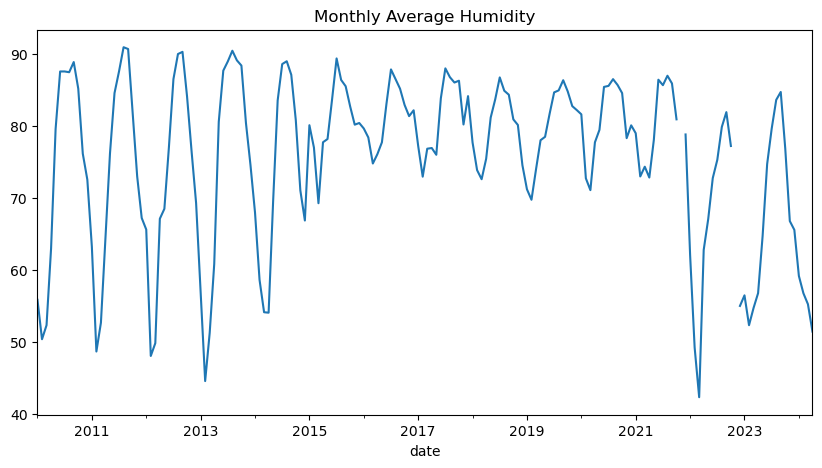

In [37]:
monthly_humidity.plot(figsize=(10,5), title="Monthly Average Humidity")
plt.show()

<Axes: title={'center': '30-Day Rolling Average Humidity'}, xlabel='date'>

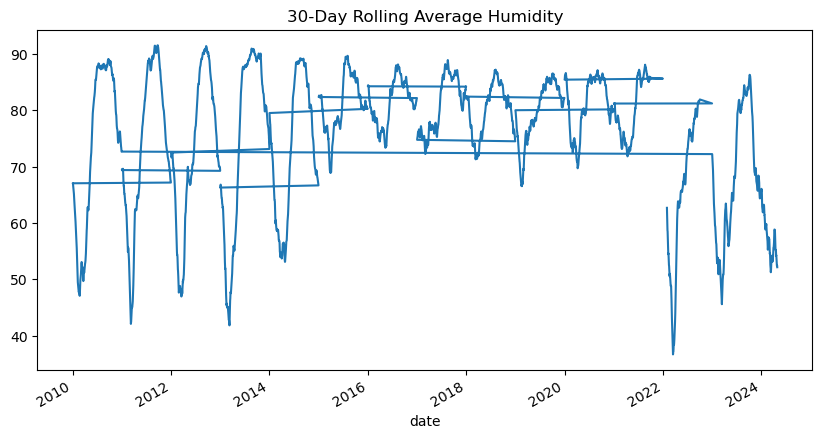

In [38]:
df['humidity'].rolling(window=30).mean().plot(figsize=(10,5), title="30-Day Rolling Average Humidity")

In [39]:
monthly_temp=df['tempC'].resample('M').mean()
print(monthly_temp)

C:\Users\user\AppData\Local\Temp\ipykernel_12732\3022471773.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp=df['tempC'].resample('M').mean()


date
2010-01-31    17.970968
2010-02-28    22.842857
2010-03-31    29.490323
2010-04-30    32.026667
2010-05-31    29.709677
                ...    
2023-12-31    20.941935
2024-01-31    18.619355
2024-02-29    23.151724
2024-03-31    27.100000
2024-04-30    32.817857
Freq: ME, Name: tempC, Length: 172, dtype: float64


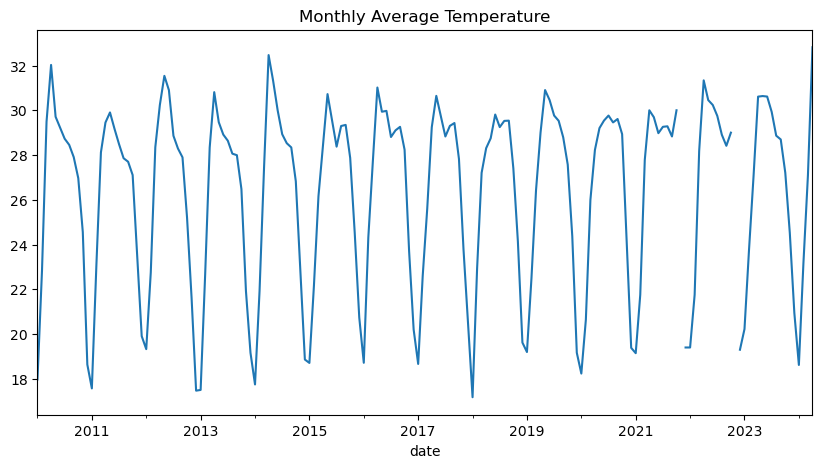

In [40]:
monthly_temp.plot(figsize=(10,5), title="Monthly Average Temperature")
plt.show()

<Axes: title={'center': '30-Day Rolling Average Temperature'}, xlabel='date'>

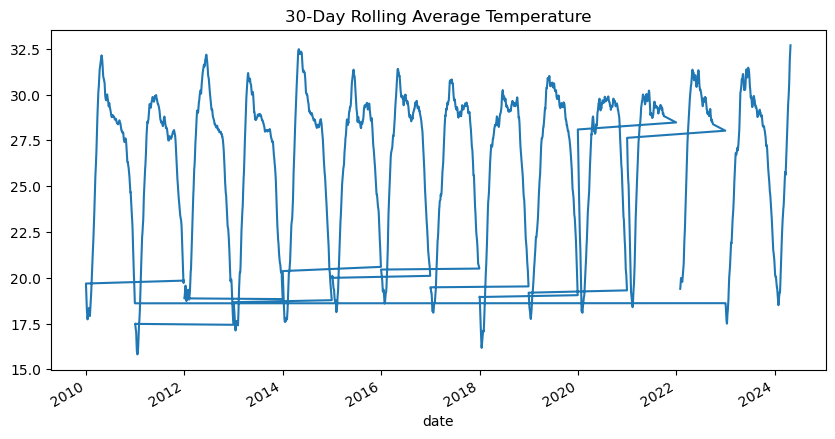

In [41]:
df['tempC'].rolling(window=30).mean().plot(figsize=(10,5), title="30-Day Rolling Average Temperature")

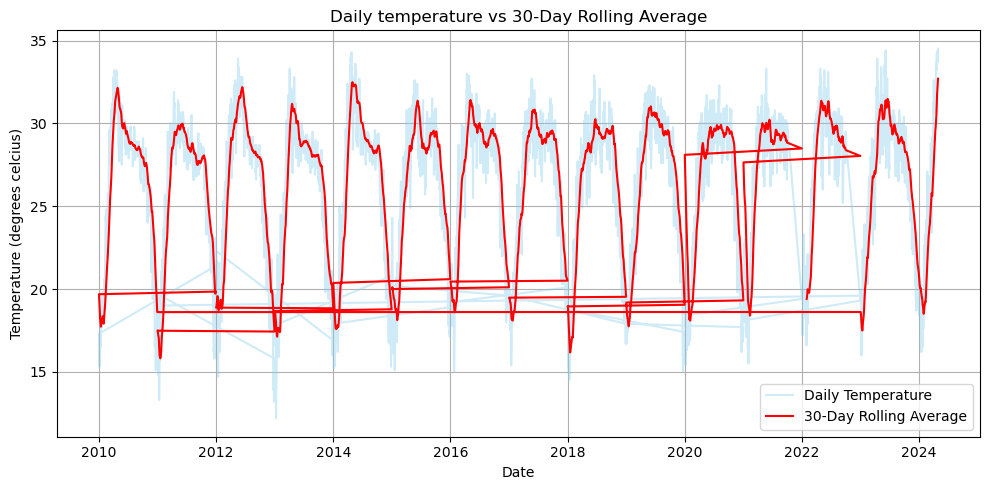

In [42]:
df['tempC_rolling30']=df['tempC'].rolling(window=30).mean()
plt.figure(figsize=(10,5))
plt.plot(df.index, df['tempC'], label="Daily Temperature", alpha=0.4, color='skyblue')
plt.plot(df.index, df['tempC_rolling30'], label="30-Day Rolling Average", color='red')
plt.title('Daily temperature vs 30-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Temperature (degrees celcius)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()